In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [ ]:
#X,y = load_iris(return_X_y=True)
#per_clf = Perceptron().fit(X[:,(2,3)],y)

#per_clf .predict([[2,5]])x

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [8]:
X_valid, X_train = X_train_full[:5000] / 255. , X_train_full[5000:] / 255.
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# Sequential Model

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer ='sgd',metrics = ['accuracy'])
history =  model.fit(X_train,y_train,epochs = 30,validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7075 - accuracy: 0.7685 - val_loss: 0.5308 - val_accuracy: 0.8164
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4857 - accuracy: 0.8309 - val_loss: 0.5155 - val_accuracy: 0.8126
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4417 - accuracy: 0.8452 - val_loss: 0.4089 - val_accuracy: 0.8618
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4147 - accuracy: 0.8555 - val_loss: 0.4094 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8610 - val_loss: 0.3996 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8680 - val_loss: 0.3664 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3650 - accuracy: 0.8715 - val_loss: 0.3719 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim([0,1])


Make predictions

In [ ]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
print(y_prob.round(2))

print(np.array(class_names)[np.argmax(y_prob,axis=1)])

for s in range(3):
    plt.subplot(1,3,s+1); plt.imshow(X_new[s],cmap = 'gray'); plt.xticks([]); plt.yticks([])



## Regression with Sequential

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_full,y_full = fetch_california_housing(return_X_y= True)
X_train,X_tmp,y_train,y_tmp = train_test_split(X_full,y_full,test_size = .2)
X_val,X_test,y_val,y_test = train_test_split(X_tmp,y_tmp,test_size = .2)

my_scaler = StandardScaler()

X_train = my_scaler.fit_transform(X_train)
X_val = my_scaler.transform(X_val)
X_test = my_scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape = X_train[0].shape),
    keras.layers.Dense(1) #only output of 1, without activation function, since it's a regression task
])
model.compile(loss='mean_squared_error',optimizer='sgd')
history = model.fit(X_train,y_train,epochs=20,validation_data = (X_val,y_val))

In [ ]:
print(model.evaluate(X_test,y_test))
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(f'Predictions: {y_pred.flatten()}')
print(f'Actual values: {y_test[:3].flatten()}')

# Functional Model

In particular, notice how we are able to "pipe" the input_ layer straight to our output layer.

In [ ]:
np.random.seed(42)
tensorflow.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape = X_train[0].shape)
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)


model = keras.Model(inputs=[input_], outputs = [output])

model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate = 1e-3))
history = model.fit(X_train,y_train,epochs = 20, validation_data = (X_val,y_val),verbose = 2)

In [ ]:
pd.DataFrame(history.history).plot(marker='o')

## Multi Input

In [ ]:
input1_ = keras.layers.Input(shape = [6],  name = 'Deep_input')
input2_ = keras.layers.Input(shape = [5] , name = 'Wide_input')

hidden1 = keras.layers.Dense(30,activation='relu')(input1_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)

concat = keras.layers.Concatenate()([input2_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs = [input1_, input2_], outputs= [output])
model.compile(loss='mean_squared_error',optimizer = keras.optimizers.SGD(learning_rate= 1e-3))

In [ ]:
# A: 6 features, B: 5 features
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_val_A, X_val_B = X_val[:,:5], X_val[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3],X_test_B[:3]

Notice the tuple for inputs passed in fit. And in the creation of the Model

In [ ]:
history = model.fit((X_train_B,X_train_A),y_train,epochs = 20, validation_data = ((X_val_B,X_val_A),y_val))

In [ ]:
mse_test = model.evaluate((X_test_B,X_test_A),y_test)
y_preds = model.predict((X_new_B,X_new_A))

print(mse_test)
print(y_preds.flatten())
print(y_test[:3].flatten())

## Multi Output

In [ ]:
input_A = keras.layers.Input(shape = [5],name = 'wide')
input_B = keras.layers.Input(shape = [6],name = 'deep')

hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)

concat = keras.layers.Concatenate()([input_A , hidden2])
output = keras.layers.Dense(1, name = 'main_output')(concat)
aux_output = keras.layers.Dense(1,name = 'aux_output')(hidden2)

model = keras.Model(inputs=[input_A,input_B],outputs = [output, aux_output])
model.compile(loss = ['mse','mse'],loss_weights = [.9, .1],optimizer = 'sgd')

Notice we pass multiple loss (can be the same) for different outputs. Also, but adding "loss_weights", we ensure the auxiliary output is not as valuable as the main output

In [ ]:
history = model.fit((X_train_A,X_train_B),(y_train,y_train),epochs = 20, validation_data = ((X_val_A,X_val_B) , (y_val,y_val)))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A,X_test_B),(y_test,y_test))
print(f'Total loss: {total_loss}')
print(f'Main loss: {main_loss}')
print(f'Aux loss: {aux_loss}')

In [ ]:
y_pred_main,y_pred_aux = model.predict([X_new_A,X_new_B])
print(y_pred_main.flatten())
print(y_pred_aux.flatten())

Evaluation and prediction will also return 2 outputs (main and auxiliary)

# SubClassing Model

In [ ]:
class WideandDeepModel(keras.Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units,activation)
        self.hidden2 = keras.layers.Dense(units,activation)
        self.main_output = keras.layers.Dense(1,name = 'main_output')
        self.aux_output = keras.layers.Dense(1,name = 'aux_output')
        
    def call(self,inputs):
        input_A, input_B = inputs
        
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        
        concat = keras.layers.concatenate([input_A, hidden2])
        
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

Subclassing allows the implementation of the model with any input layer. Also any sort of programming logic embedded in the "call" method.



In [ ]:
model= WideandDeepModel()
model.compile(loss = 'mean_squared_error',optimizer = 'sgd')
history = model.fit((X_train_A,X_train_B),(y_train,y_train), epochs = 20, validation_data = ((X_val_A,X_val_B ) , (y_val,y_val) ))

## Call Backs

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only = True)

input_A = keras.layers.Input(shape = [5], name = 'Wide_Input')
input_B = keras.layers.Input(shape = [6], name = 'Deep_Input')

hidden_1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden_2 = keras.layers.Dense(30,activation = 'relu')(hidden_1)

concat = keras.layers.Concatenate()([input_A, hidden_2])

out1 = keras.layers.Dense(1,name='main_output')(concat)
out2 = keras.layers.Dense(1,name='aux_output')(hidden_2)

model = keras.Model(inputs= [input_A, input_B],outputs = [out1,out2])    


model.compile(loss = 'mean_squared_error',loss_weights = [.9,.1], optimizer = 'sgd')
history = model.fit((X_train_A,X_train_B),(y_train,y_train), epochs = 20, validation_data = ((X_val_A,X_val_B ) , (y_val,y_val) ) , callbacks = [checkpoint_cb] )

# TensorBoard

In [ ]:
import os

root_logdir = os.path.join(os.curdir,'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m-%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
input_A = keras.layers.Input(shape = [5], name = 'Wide_Input')
input_B = keras.layers.Input(shape = [6], name = 'Deep_Input')

hidden_1 = keras.layers.Dense(30,activation = 'relu')(input_B)
hidden_2 = keras.layers.Dense(30,activation = 'relu')(hidden_1)

concat = keras.layers.Concatenate()([input_A, hidden_2])

out1 = keras.layers.Dense(1,name='main_output')(concat)
out2 = keras.layers.Dense(1,name='aux_output')(hidden_2)

model = keras.Model(inputs= [input_A, input_B],outputs = [out1,out2])    


model.compile(loss = 'mean_squared_error',loss_weights = [.9,.1], optimizer = 'sgd')


In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())

history = model.fit((X_train_A,X_train_B),(y_train,y_train), epochs = 20, validation_data = ((X_val_A,X_val_B ) , (y_val,y_val) ), callbacks=  [tensorboard_cb])

In [ ]:
model2 = keras.Model(inputs= [input_A, input_B],outputs = [out1,out2])    
model2.compile(loss = 'mean_squared_error',loss_weights = [.9,.1], optimizer = keras.optimizers.SGD(learning_rate = .5e-3))
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
history = model2.fit((X_train_A,X_train_B),(y_train,y_train), epochs = 20, validation_data = ((X_val_A,X_val_B ) , (y_val,y_val) ), callbacks=  [tensorboard_cb])

In [ ]:
test_logdir = get_run_logdir()
writer = tensorflow.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1,1000+1):
        tensorflow.summary.scalar('my_scalar', np.sin(step/ 10), step = step)
        data = (np.random.randn(100) + 2) * step/ 100 #random data
        tensorflow.summary.histogram('my_hist',data , buckets = 50,step = step)
        images = np.random.rand(2,32,32,3) #random 32 x 32
        tensorflow.summary.image('my_images',images * step /1000 , step = step)
        texts = ['the step is ' + str(step), 'Its square is ' + str(step**2)]
        tensorflow.summary.text('my_text',texts,step = step)
        sine_wave = tensorflow.math.sin(tensorflow.range(12000) / 48000 * 2*np.pi*step)
        audio = tensorflow.reshape(tensorflow.cast(sine_wave,tensorflow.float32),[1,-1,1])
        tensorflow.summary.audio('my_audio',audio,sample_rate=48000,step= step)
        

# Wrapping SciKit around Keras

Generate a function that wraps around Keras

In [ ]:
def build_model(n_hidden =1 , n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
    model.add(keras.layers.Dense(1))
    
    optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
    model.compile(loss= 'mse',optimizer = optimizer)
    
    return model

In [ ]:
## New Wrapper - Cannot run grid search on it, the parameters are not accepted by the 
from scikeras.wrappers import KerasRegressor

my_keras_reg = KerasRegressor(build_model,n_hidden =1 , n_neurons = 30, learning_rate = 3e-3)

my_keras_reg.fit(X_train,y_train, epochs = 20 , validation_data = (X_val,y_val),callbacks = [keras.callbacks.EarlyStopping(patience = 10)])


y_pred = my_keras_reg.predict(X_val)
print(y_pred)
print(my_keras_reg.score(X_test,y_test))



In [ ]:
## Following the book, depreciated method
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train,y_train,epochs = 20, validation_data = (X_val,y_val),callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

y_pred = keras_reg.predict(X_test[:3])

print(y_pred)
print(keras_reg.score(X_test,y_test))

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    'n_hidden' : range(4),
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4,3e-2)
}

ran_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter =10, cv = 3, verbose =4)
ran_search_cv.fit(X_train,y_train,epochs = 100, validation_data = (X_val, y_val), callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

In [ ]:
model = ran_search_cv.best_estimator_.model

model.save('my_keras_model.h5')

In [ ]:
param_distribs = {
    'n_hidden' : range(4),
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4,3e-2)
}

ran_search_cv = RandomizedSearchCV(my_keras_reg,param_distribs,n_iter = 10, cv = 3, verbose =4)
ran_search_cv.fit(X_train,y_train,epochs = 100, validation_data = (X_val, y_val), callbacks = [keras.callbacks.EarlyStopping(patience = 10), keras.callbacks.ModelCheckpoint('new_my_keras_model.h5')])

In [ ]:
ran_search_cv.best_index_

In [ ]:
model = ran_search_cv.best_estimator_.model()

model.save('new_my_keras_model.h5')

In [ ]:
m1 = keras.models.load_model('new_my_keras_model.h5')
m2 = keras.models.load_model('my_keras_model.h5')

In [ ]:
from sklearn.metrics import r2_score

y_pred = m1.predict(X_val)
print(r2_score(y_pred,y_val))

plt.scatter(m1.predict(X_test),y_test,color='blue',marker='o')


In [ ]:
import matplotlib.pyplot as plt
y_pred = m2.predict(X_val)
print(r2_score(y_pred,y_val))

plt.scatter(m2.predict(X_test),y_test,color='blue',marker='o'); plt.xlim([0,8]); plt.ylim([0,8])

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_val)
print(r2_score(y_pred,y_val))

plt.scatter(lr.predict(X_test),y_test,color='blue',marker='o'); plt.xlim([0,8]); plt.ylim([0,8])

# Exercise 10

In [4]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split, RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

np.random.seed(42)
tf.random.set_seed(42)

In [5]:
root_logdir = os.path.join(os.curdir,'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m-%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [6]:
(X_train_full,y_train_full), (X_test,y_test) = keras.datasets.mnist.load_data()

X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size = .2)

X_val , X_test, X_train = X_val/255. , X_test/255., X_train/255.

In [7]:
def lr_scheduler(epoch,lr):
    lrs = 10**np.linspace(-7,0,100,dtype = np.float32)
    try:
        return lrs[epoch]
    except ERR:
        return lr
        

In [8]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist_model2.h5',monitor = 'val_accuracy',verbose = 1,save_best_only = True)
earlystop_cb = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',verbose = 1, patience = 20,restore_best_weights = True)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
lr_cb = keras.callbacks.LearningRateScheduler(lr_scheduler, verbose = 1)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28), name = 'in_flat'),
    keras.layers.Dense(300,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax'),
])

model.compile(loss= 'sparse_categorical_crossentropy',optimizer = keras.optimizers.SGD(learning_rate = 1e-3),metrics = ['accuracy'])
history = model.fit(X_train,y_train, epochs = 100, validation_data = (X_val,y_val),
         callbacks = [checkpoint_cb,earlystop_cb,tensorboard_cb,lr_cb])


Epoch 1: LearningRateScheduler setting learning rate to 1.0000000116860974e-07.
Epoch 1/100
1488/1500 [============================>.] - ETA: 0s - loss: 2.4380 - accuracy: 0.0793
Epoch 1: val_accuracy improved from -inf to 0.07908, saving model to mnist_model2.h5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.4378 - accuracy: 0.0794 - val_loss: 2.4373 - val_accuracy: 0.0791 - lr: 1.0000e-07

Epoch 2: LearningRateScheduler setting learning rate to 1.1768113239440936e-07.
Epoch 2/100
1486/1500 [============================>.] - ETA: 0s - loss: 2.4376 - accuracy: 0.0794
Epoch 2: val_accuracy improved from 0.07908 to 0.07917, saving model to mnist_model2.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.4377 - accuracy: 0.0794 - val_loss: 2.4372 - val_accuracy: 0.0792 - lr: 1.1768e-07

Epoch 3: LearningRateScheduler setting learning rate to 1.3848864455212606e-07.
Epoch 3/100
1491/1500 [============================>.] - ETA: 0s - loss: 2.4377 - accu

In [10]:
hist_df = pd.DataFrame(history.history)

<AxesSubplot:xlabel='lr'>

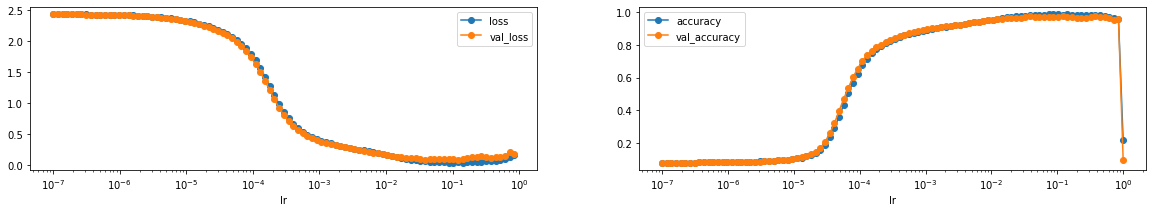

In [11]:
_,ax = plt.subplots(ncols =2 , figsize = (20,3))
hist_df.plot(x = 'lr',y = ['loss','val_loss'],ax=ax[0],marker='o',logx = True)
hist_df.plot(x = 'lr',y = ['accuracy','val_accuracy'],ax=ax[1],marker='o', logx = True)

In [28]:
print(hist_df[['loss','val_loss']].idxmin())
print(hist_df[['accuracy','val_accuracy']].idxmax())

indx = np.mean([hist_df[['loss','val_loss']].idxmin().values,hist_df[['accuracy','val_accuracy']].idxmax().values])
print(int(indx))

opt_lr = hist_df.loc[int(indx),'lr']
print(opt_lr)

loss        85
val_loss    86
dtype: int64
accuracy        85
val_accuracy    86
dtype: int64
85
0.1023531


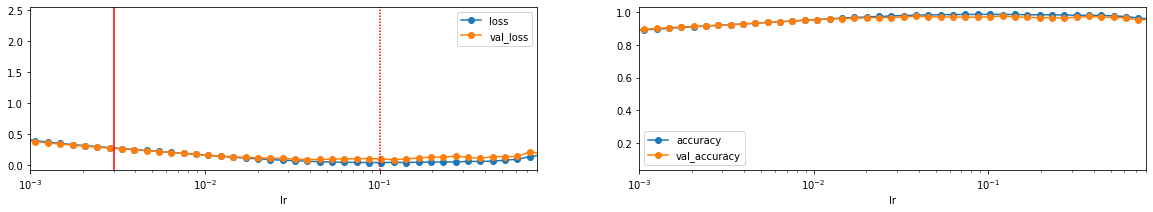

In [41]:
_,ax = plt.subplots(ncols =2 , figsize = (20,3))
hist_df.plot(x = 'lr',y = ['loss','val_loss'],ax=ax[0],marker='o',logx = True); ax[0].set_xlim([.001, .8])
hist_df.plot(x = 'lr',y = ['accuracy','val_accuracy'],ax=ax[1],marker='o', logx = True); ax[1].set_xlim([.001, .8])

ax[0].axvline(1e-1,0,2,color = 'r',dashes = (1,1,1,1))
ax[0].axvline(3e-3,0,2,color = 'r')

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28), name = 'in_flat'),
    keras.layers.Dense(300,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax'),
])

checkpoint_cb = keras.callbacks.ModelCheckpoint('opt_mnist_model.h5',monitor = 'val_accuracy',verbose = 1,save_best_only = True)
earlystop_cb = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',verbose = 1, patience = 20,restore_best_weights = True)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())

model.compile(loss= 'sparse_categorical_crossentropy',optimizer = keras.optimizers.SGD(learning_rate = opt_lr),metrics = ['accuracy'])
history = model.fit(X_train,y_train, epochs = 100, validation_data = (X_val,y_val),
         callbacks = [checkpoint_cb,earlystop_cb,tensorboard_cb])

Epoch 1/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.2789 - accuracy: 0.9169
Epoch 1: val_accuracy improved from -inf to 0.94908, saving model to opt_mnist_model.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2789 - accuracy: 0.9169 - val_loss: 0.1682 - val_accuracy: 0.9491
Epoch 2/100
1489/1500 [============================>.] - ETA: 0s - loss: 0.1144 - accuracy: 0.9650
Epoch 2: val_accuracy improved from 0.94908 to 0.96950, saving model to opt_mnist_model.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1141 - accuracy: 0.9651 - val_loss: 0.1001 - val_accuracy: 0.9695
Epoch 3/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.0761 - accuracy: 0.9770
Epoch 3: val_accuracy improved from 0.96950 to 0.97350, saving model to opt_mnist_model.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9769 - val_loss: 0.0832 - val_accuracy: 0.9735
Epoch 4/100
1500/1500 [===========

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9823


[0.08299919962882996, 0.9822999835014343]

In [32]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28), name = 'in_flat'),
    keras.layers.Dense(300,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax'),
])

checkpoint_cb = keras.callbacks.ModelCheckpoint('ageron_opt_mnist_model.h5',monitor = 'val_accuracy',verbose = 1,save_best_only = True)
earlystop_cb = keras.callbacks.EarlyStopping(monitor = 'val_accuracy',verbose = 1, patience = 20,restore_best_weights = True)
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())

model.compile(loss= 'sparse_categorical_crossentropy',optimizer = keras.optimizers.SGD(learning_rate = 3e-1),metrics = ['accuracy'])
history = model.fit(X_train,y_train, epochs = 100, validation_data = (X_val,y_val),
         callbacks = [checkpoint_cb,earlystop_cb,tensorboard_cb])

Epoch 1/100
1493/1500 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9254
Epoch 1: val_accuracy improved from -inf to 0.94675, saving model to ageron_opt_mnist_model.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2391 - accuracy: 0.9255 - val_loss: 0.1692 - val_accuracy: 0.9467
Epoch 2/100
1482/1500 [============================>.] - ETA: 0s - loss: 0.0998 - accuracy: 0.9692
Epoch 2: val_accuracy improved from 0.94675 to 0.97142, saving model to ageron_opt_mnist_model.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0924 - val_accuracy: 0.9714
Epoch 3/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.9794
Epoch 3: val_accuracy improved from 0.97142 to 0.97233, saving model to ageron_opt_mnist_model.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.0927 - val_accuracy: 0.9723
Epoch 4/100
1

In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1049 - accuracy: 0.9849


[0.1049141138792038, 0.9848999977111816]

### Test My Model

In [54]:
my_model = keras.models.load_model('opt_mnist_model.h5')

rnsamp = np.random.choice(range(len(X_test)),4)
preds = my_model.predict(X_test[rnsamp])

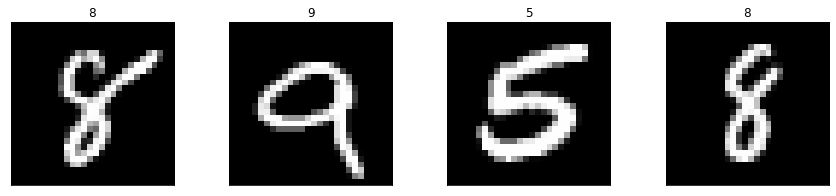

In [56]:
ncols = preds.shape[0]
nrows = 1
fig = plt.figure(figsize=(15,3))
for s in range(len(rnsamp)):
    plt.subplot(nrows,ncols,s+1); 
    plt.imshow(X_test[rnsamp[s]],cmap = 'gray'); plt.xticks([]); plt.yticks([]); plt.title(np.argmax(preds[s]))